In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train,y_train),(X_test, y_test)= keras.datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

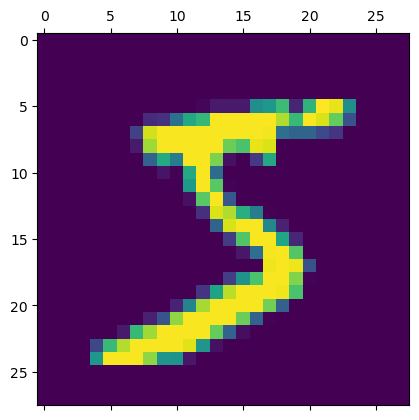

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

#### Flatten the dataset from a 2 dimentional array to a one dimentiional array

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

### Scale the dataset so that it will be between 0 to 1

In [14]:
X_train = X_train/255

In [15]:
X_test = X_test/255

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

#### Create a simple nueral network using keras


In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 12s 2ms/step - loss: 0.4758 - accuracy: 0.8749
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9249


#### Evaluate the accuracy of the model on the test dataset

In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.2658 - accuracy: 0.9261


[0.26577314734458923, 0.9261000156402588]

#### Try predicting some values

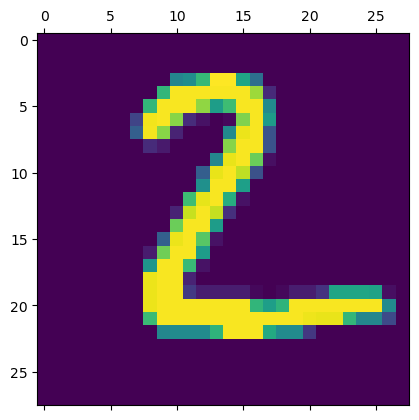

In [21]:
plt.matshow(X_test[1])

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([4.13569987e-01, 3.81038128e-03, 9.99257624e-01, 2.17489213e-01,
       4.88787844e-10, 7.94899166e-01, 8.64645481e-01, 1.12661594e-12,
       1.08361445e-01, 1.33199973e-09], dtype=float32)

In [23]:
np.argmax(y_predicted[1])

2

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels) 
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    5,    9,    2,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    9,  924,   15,    6,    4,   14,   10,   42,    5],
       [   3,    0,   20,  916,    1,   25,    4,   11,   22,    8],
       [   1,    1,    2,    2,  903,    0,   15,    5,    9,   44],
       [  10,    2,    2,   33,    9,  769,   17,    6,   38,    6],
       [   8,    3,    7,    1,    7,    8,  921,    2,    1,    0],
       [   1,    5,   23,    5,    5,    0,    0,  945,    4,   40],
       [   6,    8,    6,   16,    8,   23,   11,    8,  881,    7],
       [   9,    7,    2,   10,   15,    6,    0,   21,    8,  931]])>

Text(95.72222222222221, 0.5, 'Truth')

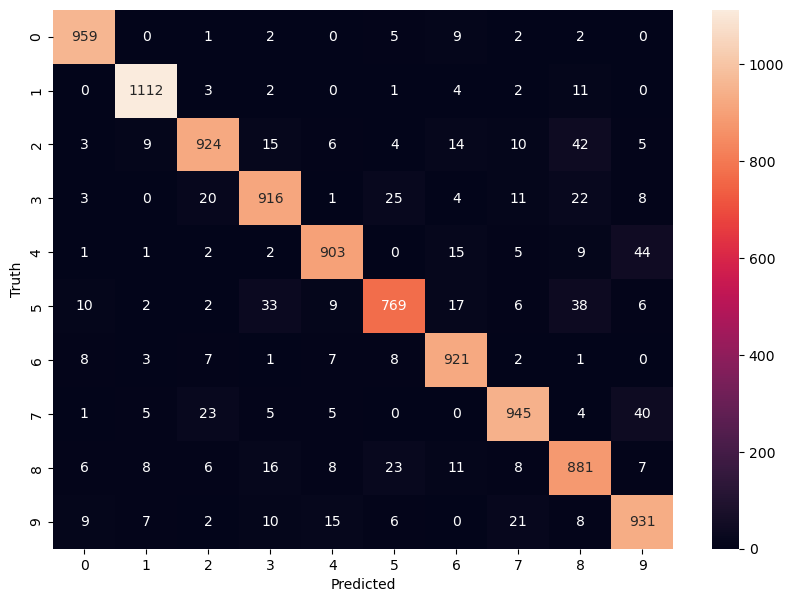

In [27]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Adding hidden layer to the neural network

In [28]:
model = keras.Sequential([
    keras.layers.Dense(350, input_shape = (784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1950 - accuracy: 0.9417
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0827 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0569 - accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0439 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0318 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0238 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0181 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [29]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0947 - accuracy: 0.9794


[0.09473935514688492, 0.9793999791145325]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

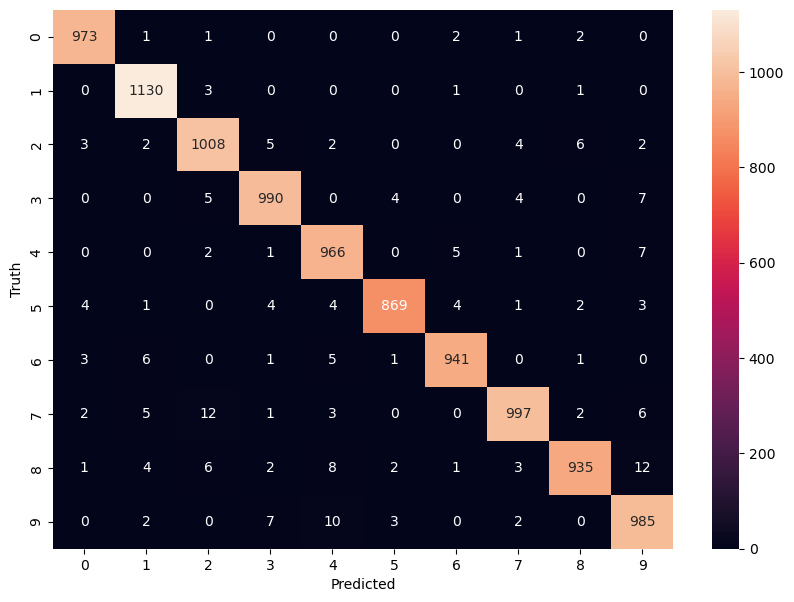

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels) 

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

To avoid flattening your array manually everytime, you can make use of the inbuilt flatten fuction in keras

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(350, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
 
model.compile(
    optimizer ='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=10, callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5867 - accuracy: 0.8498
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2768 - accuracy: 0.9221
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2242 - accuracy: 0.9364
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1897 - accuracy: 0.9463
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1647 - accuracy: 0.9534
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1450 - accuracy: 0.9588
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1295 - accuracy: 0.9638
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1168 - accuracy: 0.9670
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1060 - accuracy: 0.9701
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.09

### Build a Convolutional Neural Network

In [35]:
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)


In [36]:
from tensorflow.keras import layers, models

In [38]:
cnn =  models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

cnn.compile(optimizer = 'adam', 
           loss = 'sparse_categorical_crossentropy',
           metrics= ['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 15ms/step - loss: 0.1522 - accuracy: 0.9535
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0495 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0349 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0250 - accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0198 - accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0150 - accuracy: 0.9950
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0102 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0082 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [39]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.0338 - accuracy: 0.9924


[0.03379639983177185, 0.9923999905586243]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

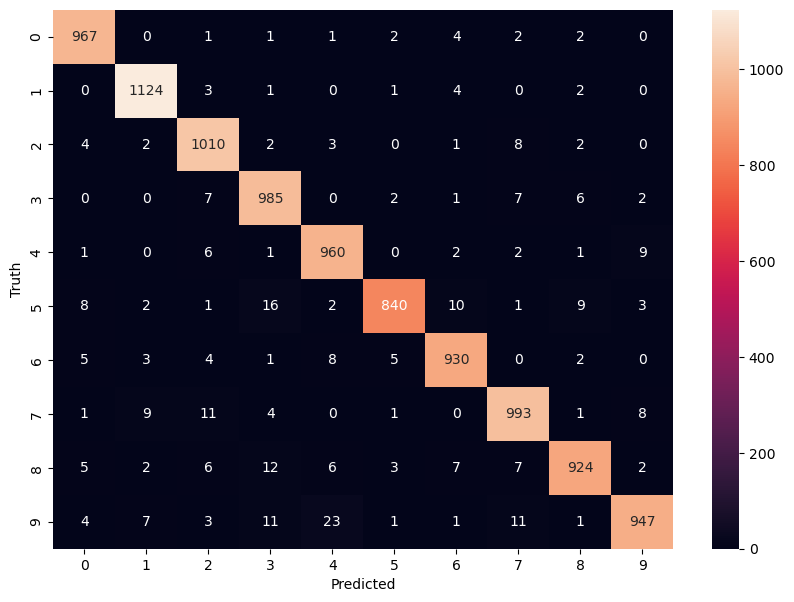

In [41]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels) 

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')